In [ ]:
# upload file yang sudah diunduh
# file akan disimpan sesuai dengan nama file yang diunggah
from google.colab import files
file = files.upload()

Saving 17882562_1307045769381008_2265934740034945024_n.jpg to 17882562_1307045769381008_2265934740034945024_n.jpg


In [ ]:
!ls

17882562_1307045769381008_2265934740034945024_n.jpg  sample_data


In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
# memanggil library opencv
import cv2 
# memanggil fungsi google colab untuk perbaikan cv2.imshow
from google.colab.patches import cv2_imshow
#For Image Display
from skimage import data, filters, io
from skimage.color import rgb2hsv
from PIL import Image 

%matplotlib inline

# ***Operasi Piksel dan Histogram pada Citra***

In [ ]:
img = cv2.imread("nois2.jpg")
print(img.shape)


(863, 865, 3)


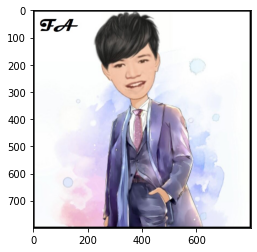

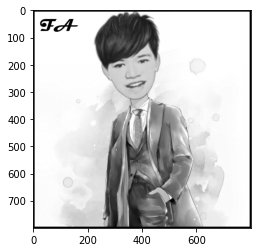

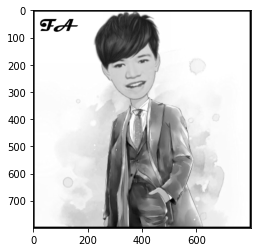

In [ ]:
beach = cv2.imread("nois2.jpg")[:,:,::-1]
beach_gray = cv2.imread("nois2.jpg", cv2.IMREAD_GRAYSCALE)
#cv2.cvtColor(beach, cv2.COLOR_RGB2GRAY)

plt.imshow(beach)
plt.figure()
plt.imshow(beach_gray, cmap = plt.cm.gray)
plt.figure()
plt.imshow(cv2.cvtColor(beach[:,:,::-1], cv2.COLOR_BGR2GRAY), cmap = plt.cm.gray)

<Figure size 432x288 with 0 Axes>

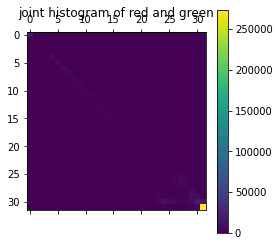

<Figure size 432x288 with 0 Axes>

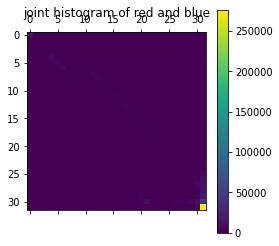

<Figure size 432x288 with 0 Axes>

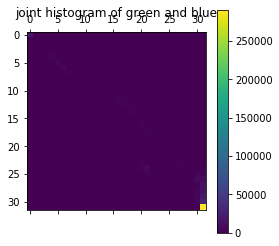

In [ ]:
r, g, b = cv2.split(beach)
channels = {"red": r, "green": g, "blue": b}
import itertools

for c1, c2 in list(itertools.combinations(channels, 2)):
    
    rg_hist = cv2.calcHist([channels[c1], channels[c2]], [0, 1], 
                           None, [32, 32], [0, 256, 0, 256])
    plt.figure()
    plt.matshow(rg_hist)
    plt.colorbar()
    plt.title("joint histogram of %s and %s" % (c1, c2))

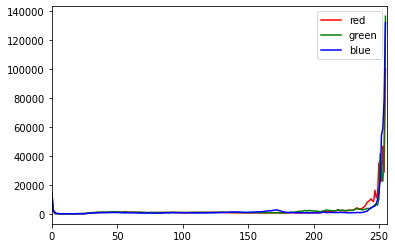

In [ ]:
for i, col in enumerate(["red", "green", "blue"]):
    col_img = beach[:, :, i]
    col_hist = cv2.calcHist([col_img], [0], mask = None, 
                         histSize = [256], ranges = [0, 256])
    plt.plot(col_hist, color = col, label = col)

plt.xlim([0, 256])
plt.legend()

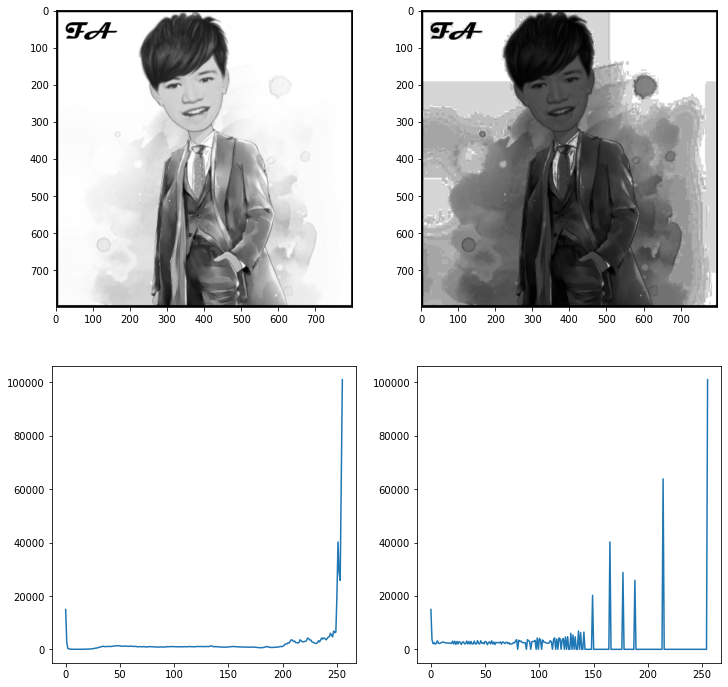

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (2 * 6, 2 * 6))
equalized_gray = cv2.equalizeHist(beach_gray, )
axes[0, 0].imshow(beach_gray, cmap = plt.cm.gray)
axes[0, 1].imshow(equalized_gray, cmap = plt.cm.gray)

axes[1, 0].plot(cv2.calcHist([beach_gray], [0], None, [256], [0, 256], ))
axes[1, 1].plot(cv2.calcHist([equalized_gray], [0], None, [256], [0, 256], ))

# ***Operasi Ketetanggan Piksel***

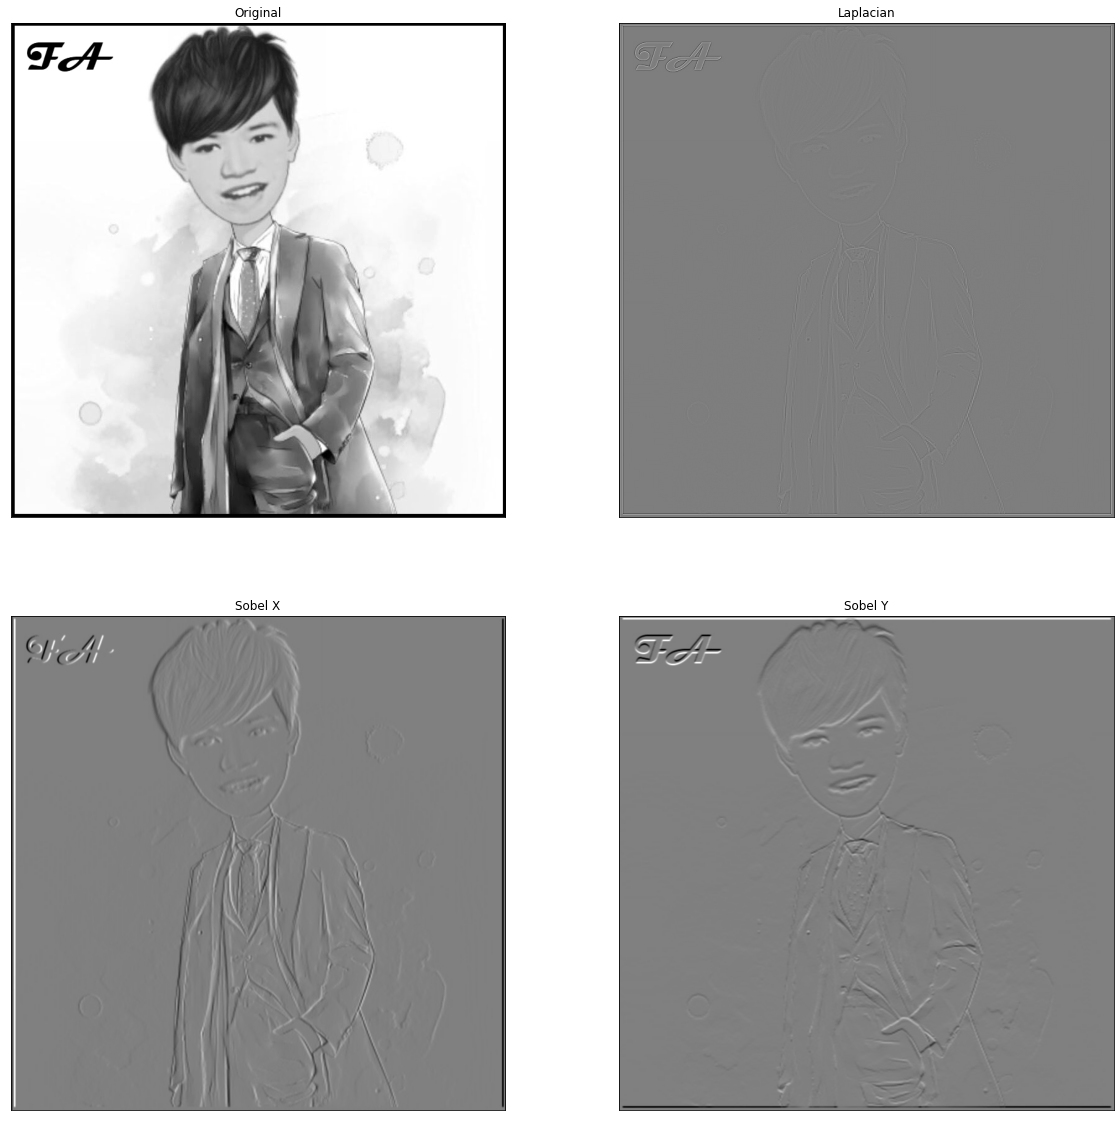

In [ ]:
# memanggil citra sebagai grayscale (argument 0)
img = cv2.imread('fahmi x.jpg',0)

# menerapkan algoritma high-pass filtering:
# laplacian
laplacian = cv2.Laplacian(img,cv2.CV_64F)

# sobel dengan ukuran kernel 5
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

# Catatan:
# CV_64F pada contoh di atas menunjukkan nilai bit dari citra 
# yang dihasilkan serta tipe datanya (F = Float)

# perbesar ukuran hasil plotting 
plt.rcParams["figure.figsize"] = (20,20)


# menampilkan hasil filter
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()



In [ ]:
img_fahmi = cv2.imread("einstein.jpg" , cv2.IMREAD_GRAYSCALE)  
print(img_fahmi.shape)

img_itachi = cv2.imread("bunga fahmi.jpg" , cv2.IMREAD_GRAYSCALE)  
print(img_itachi.shape)

(800, 800)


AttributeError: ignored

In [ ]:
#import library untuk plot nya
import numpy as np
import matplotlib.pyplot as plt

#Fungsi / Rumusnya
def filter_batas(image):
  buf = image.copy()
  for h in range(1, image.shape[0]):
    for w in range(1, image.shape[1]):
      min_pixel = np.min(image[h-1:h+1, w-1:w+1])
      max_pixel = np.min(image[h-1:h+1, w-1:w+1])

      if image[h, w] < min_pixel:
        buf[h, w] = min_pixel
      elif image[h, w] > min_pixel:
        buf[h, w] = max_pixel
      else:
        buf[h, w] = image[h, w]

  return buf

img_batas_fahmi = filter_batas(img_fahmi)
img_batas_itachi = filter_batas(img_itachi)

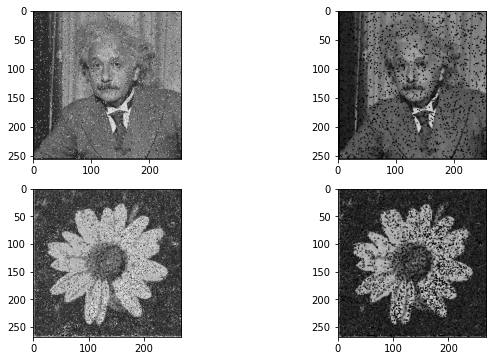

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

axes[0, 0].imshow(img_fahmi, cmap = "gray")
axes[0, 1].imshow(img_batas_fahmi, cmap = "gray")

axes[1, 0].imshow(img_itachi, cmap = "gray")
axes[1, 1].imshow(img_batas_itachi, cmap = "gray")

plt.show()

In [ ]:
img_fahmi = cv2.imread("einstein.jpg" , cv2.IMREAD_GRAYSCALE)  
print(img_fahmi.shape)

img_itachi = cv2.imread("bunga fahmi.jpg" , cv2.IMREAD_GRAYSCALE)  
print(img_itachi.shape)

(256, 256)
(268, 268)


In [ ]:
def filter_rerata(image):
  buf = image.copy()
  for h in range(1, image.shape[0]):
    for w in range(1, image.shape[1]):
      buf[h, w] = np.mean(image[h-1:h+1, w-1:w+1])


  return buf

img_rerata_fahmi = filter_rerata(img_fahmi)
img_rerata_itachi = filter_rerata(img_itachi)

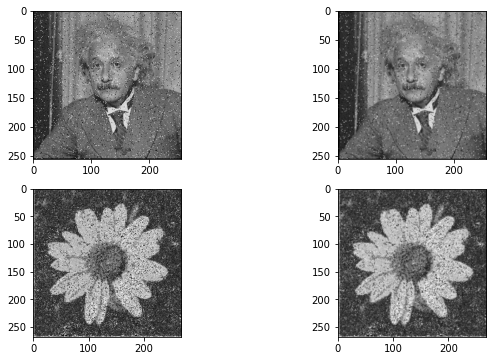

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

axes[0, 0].imshow(img_fahmi, cmap = "gray")
axes[0, 1].imshow(img_rerata_fahmi, cmap = "gray")

axes[1, 0].imshow(img_itachi, cmap = "gray")
axes[1, 1].imshow(img_rerata_itachi, cmap = "gray")

plt.show()

In [ ]:
img_fahmi = cv2.imread("einstein.jpg" , cv2.IMREAD_GRAYSCALE)  
print(img_fahmi.shape)

img_itachi = cv2.imread("bunga fahmi.jpg" , cv2.IMREAD_GRAYSCALE)  
print(img_itachi.shape)

(256, 256)
(268, 268)


In [ ]:
def filter_median(image):
  buf = image.copy()
  for h in range(1, image.shape[0]):
    for w in range(1, image.shape[1]):
      buf[h, w] = np.median(image[h-1:h+1, w-1:w+1])


  return buf

img_median_fahmi = filter_median(img_fahmi)
img_median_itachi = filter_median(img_itachi)

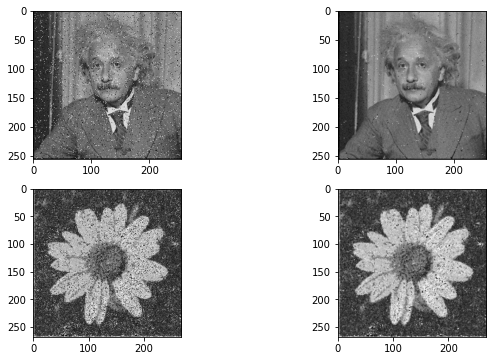

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

axes[0, 0].imshow(img_fahmi, cmap = "gray")
axes[0, 1].imshow(img_median_fahmi, cmap = "gray")

axes[1, 0].imshow(img_itachi, cmap = "gray")
axes[1, 1].imshow(img_median_itachi, cmap = "gray")

plt.show()

In [ ]:
img = cv2.imread("17882562_1307045769381008_2265934740034945024_n.jpg" , cv2.IMREAD_GRAYSCALE)
print(img.shape)

(800, 800)


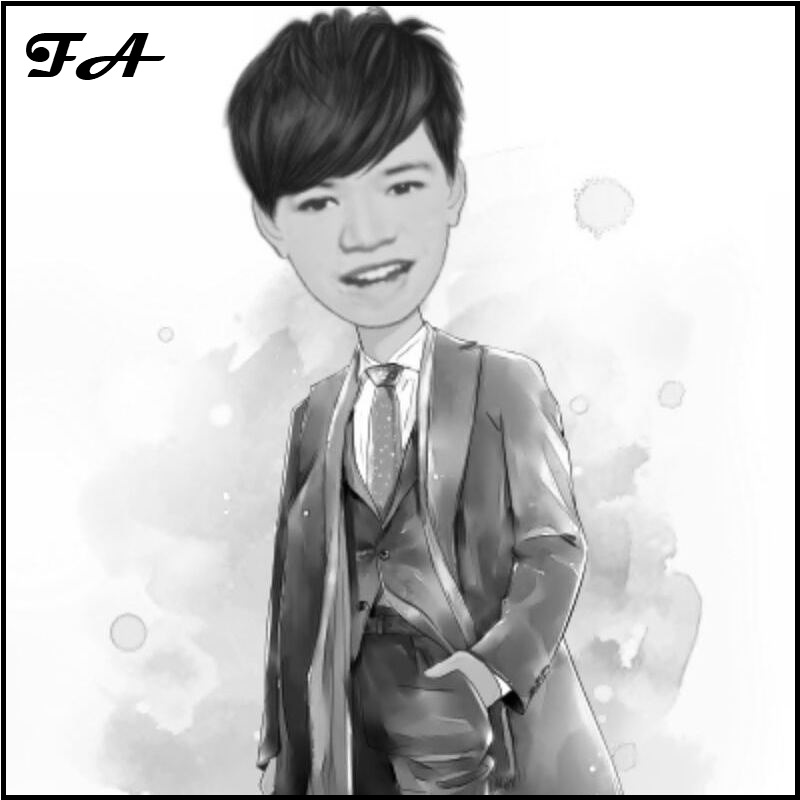

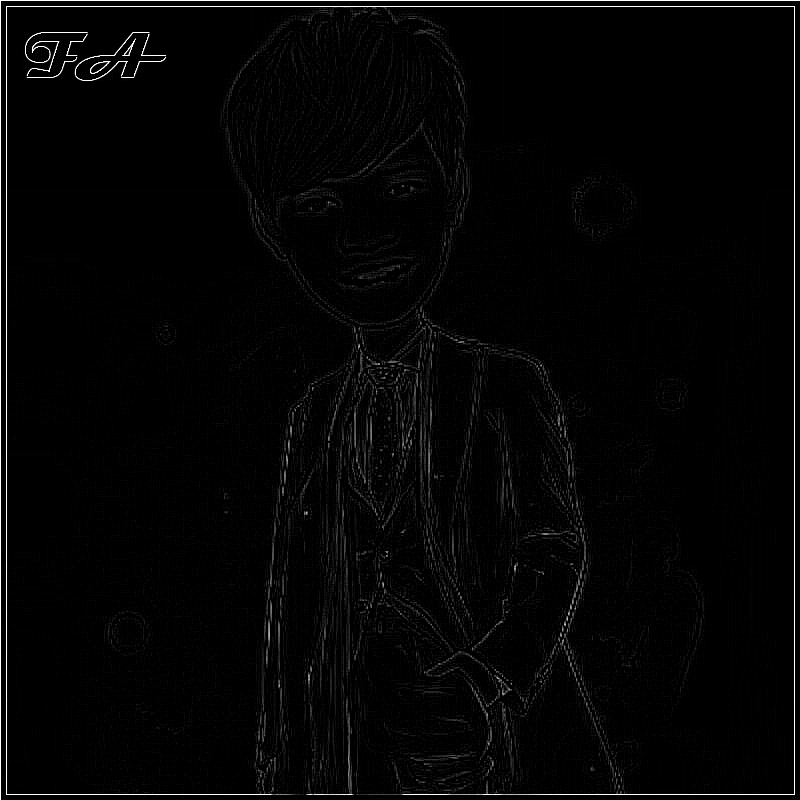

In [ ]:
cv2_imshow(img)

kernel = np.array([[-1, 0, -1], [0, 4, 0], [-1 , 0 , -1]])
img_convoluted = cv2.filter2D(img , -1 , kernel)

cv2_imshow(img_convoluted)

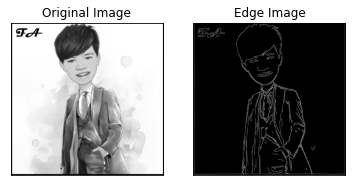

In [ ]:
img = cv2.imread('17882562_1307045769381008_2265934740034945024_n.jpg',0)

# deteksi tepi dengan Canny Edge
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

Jumlah kontur yang berhasil dideteksi = 153


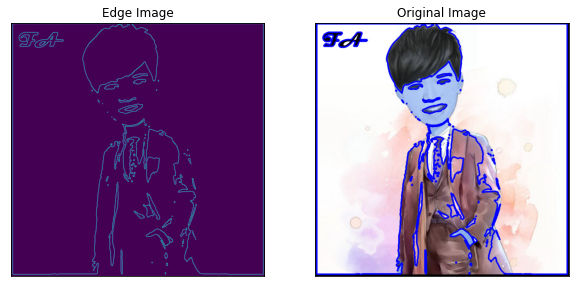

In [ ]:
# gambar berwarna untuk diplot
img_ori = cv2.imread('17882562_1307045769381008_2265934740034945024_n.jpg')

# grayscale untuk diolah
diolah = cv2.imread('17882562_1307045769381008_2265934740034945024_n.jpg',0)

# Menerapkan Gaussian filtering sebelum Otsu’s thresholding
blur = cv2.GaussianBlur(diolah,(5,5),0)

# Otsu
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
# Menggunakan Canny Edge untuk deteksi tepi
edged = cv2.Canny(th3, 30, 200) 
  
# mencari kontur
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
  

  
print("Jumlah kontur yang berhasil dideteksi = " + str(len(contours))) 
  
# Gambar kontur yang dideteksi
# -1 artinya gambar semua kontur yang ditemukan
cv2.drawContours(img_ori, contours, -1, (1,1,255), 3) 
  


fig, axes = plt.subplots(2, 2, figsize=(10, 6))

axes[0, 0].imshow(edged, cmap = "gray")
axes[0, 1].imshow(img_ori, cmap = "gray")

plt.subplot(121),plt.imshow(edged)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_ori)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.show()


# ***Operasi Geometrik***

In [ ]:
img = cv2.imread("Foto Fahmi.jpeg")
print(img.shape)

(1280, 750, 3)


(384, 225, 3)


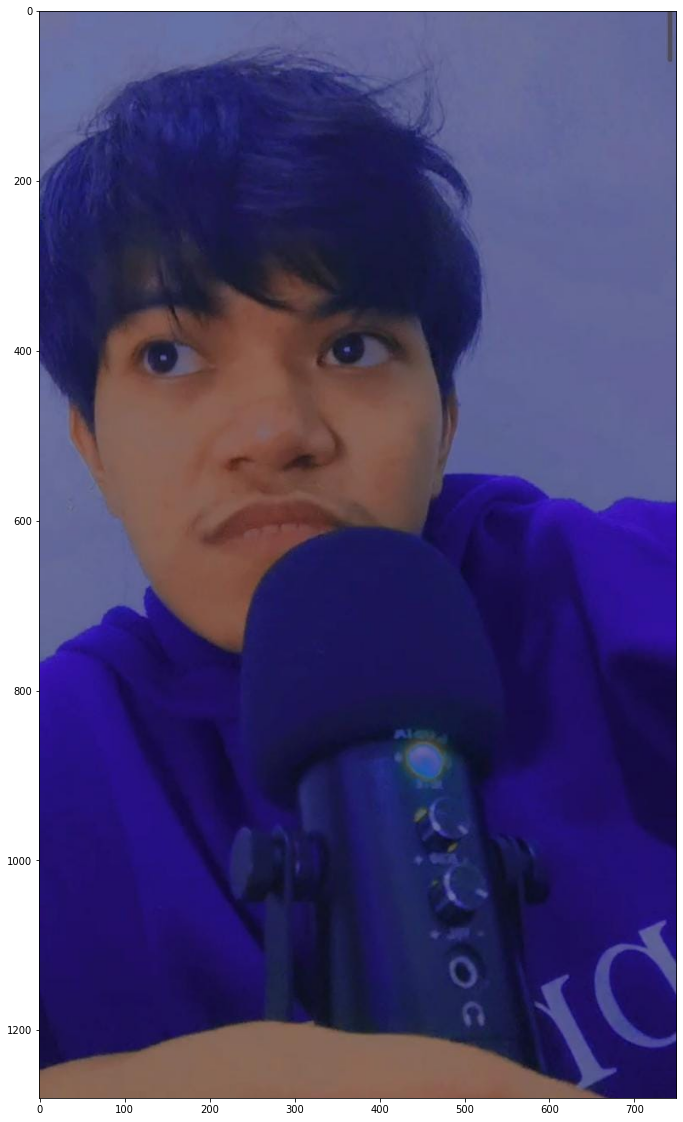

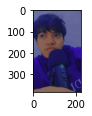

In [ ]:
# Resize / Mengubah Ukuran

img = cv2.imread("Foto Fahmi.jpeg")[:, :, ::-1]
width, height = int(img.shape[1]*0.3), int(img.shape[0]*0.3)
img_resize = cv2.resize(img, 
                          (width, height), 
                          interpolation = cv2.INTER_AREA,)

plt.imshow(img)

plt.figure(figsize = (1.5, 1.5))
plt.imshow(img_resize)
print(img_resize.shape)

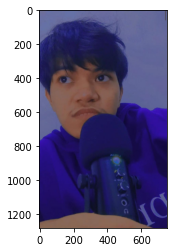

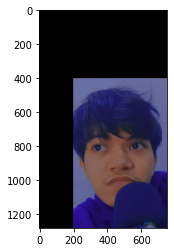

In [ ]:
img_translation = cv2.warpAffine(img, 
               np.array([[1, 0, 200], 
                        [0, 1, 400]], 
                dtype = np.float64),
               dsize = (img.shape[1], img.shape[0])) # right down shift

plt.imshow(img)
plt.figure()
plt.imshow(img_translation)

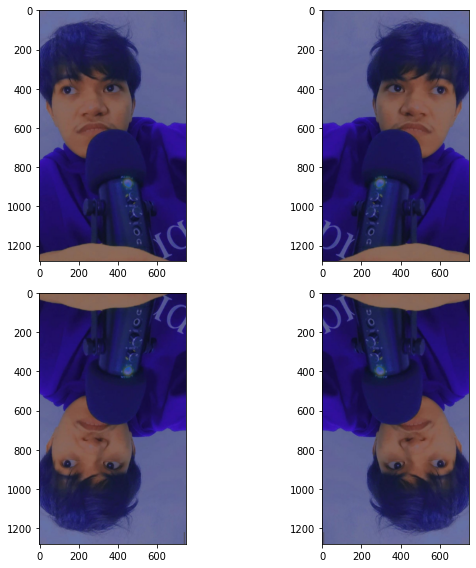

In [ ]:
# Flipping / Membalik

fig, axes = plt.subplots(2, 2, figsize = (8, 8))
fig.tight_layout()
axes = axes.ravel()
axes[0].imshow(img)
axes[1].imshow(img[:, ::-1, :])
axes[2].imshow(img[::-1, :, :])
axes[3].imshow(img[::-1, ::-1, :])

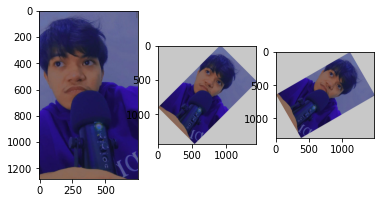

In [ ]:
# Rotasi / Memutar

def rotate(image, angle, border_color=None):
    # grab the dimensions of the image and then determine the
    # center
    if border_color == None:
        border_color=(255, 255, 255)

    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
 
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
 
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
 
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
 
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH), borderValue=border_color)

rotated_image1 = rotate(img, angle=45, border_color = (200, 200, 200))
rotated_image2 = rotate(img, angle=60, border_color = (200, 200, 200))

fig = plt.figure()
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(rotated_image1)
plt.subplot(133)
plt.imshow(rotated_image2)

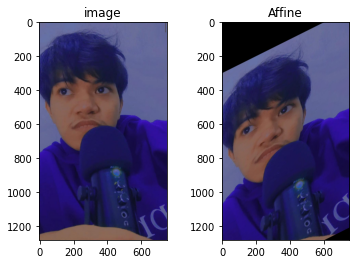

In [ ]:
# Affine Transformation / Merubah Afinitas

rows, cols, ch = img.shape
cv2.circle(img, (200,100), 20, (255,0,0),-1)
cv2.circle(img, (400,100), 20, (0,255,0),-1)
cv2.circle(img, (200,200), 20, (0,0,255),-1)

pts1 = np.float32([[200,100],[400,100],[200,200]])
pts2 = np.float32([[200,300],[400,200],[200,400]])

M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine')
plt.show()

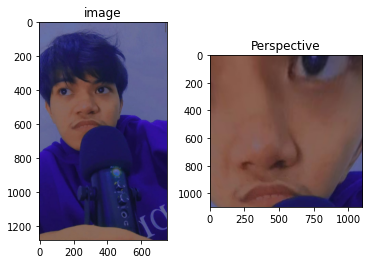

In [ ]:
# Perspective Transformation / Mengubah Perspektif
cv2.circle(img, (220,400), 10, (255,0,0),-1)
cv2.circle(img, (410,400), 10, (0,255,0),-1)
cv2.circle(img, (120,600), 10, (0,0,255),-1)
cv2.circle(img, (500,600), 10, (0,0,0),-1)

pts1 = np.float32([[220,400],[120,600],[410,400],[500,600]])
pts2 = np.float32([[10,10],[10,1000],[1000,10],[1000,1000]])

M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(img, M, (1100,1100))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Perspective')
plt.show()

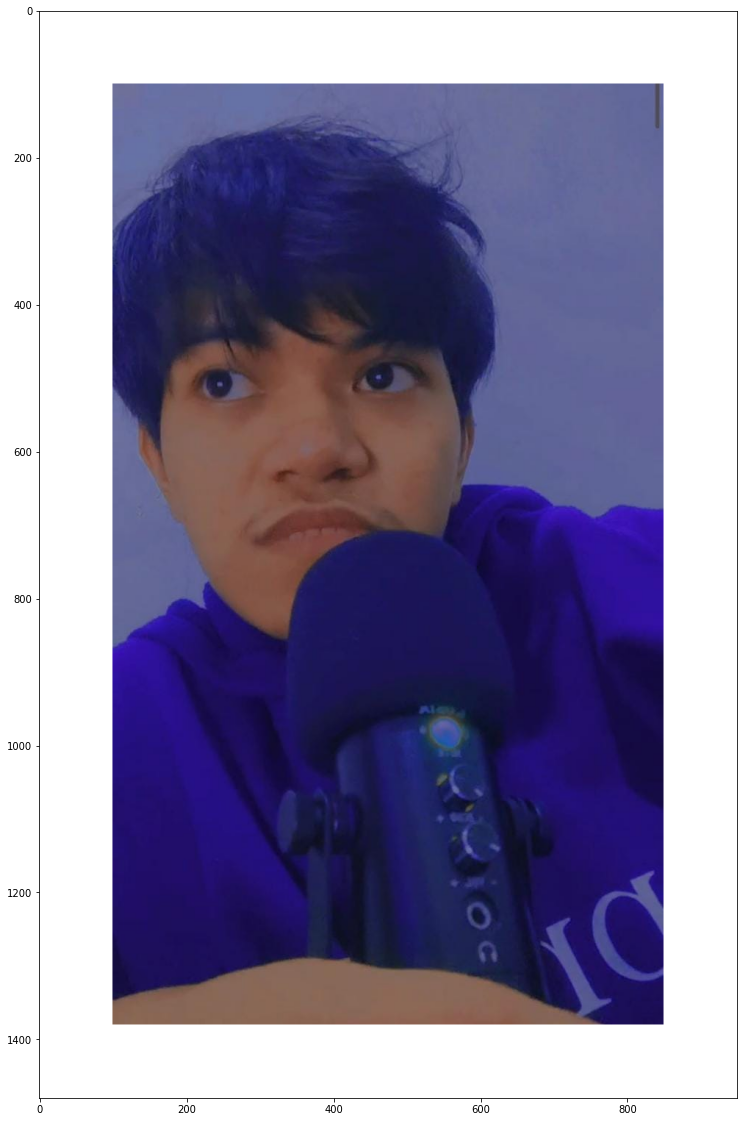

Berbagai Gambar 


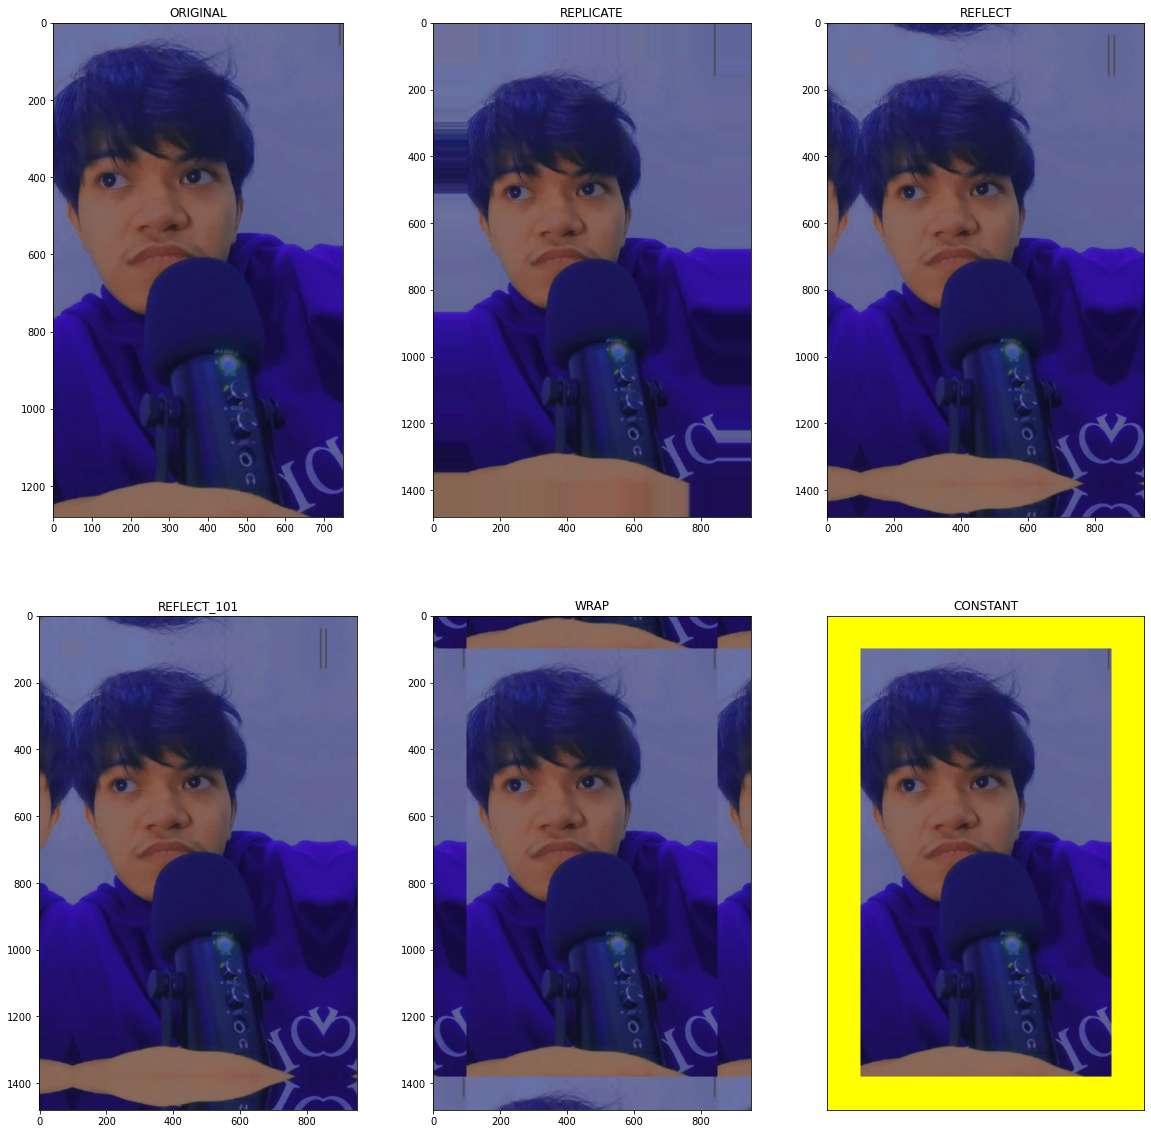

In [ ]:
# Padding / Menambahkan Lapisan Gambar (Border) atau Memberi (Frame) Bingkai .

bordersize = 100
color = [255, 255, 255]
bordered_img=cv2.copyMakeBorder(img, 
                                top=bordersize,bottom=bordersize, 
                                left=bordersize, right=bordersize, 
                                borderType= cv2.BORDER_CONSTANT, 
                                value=color )

#cv2.circle(bordered_img, (300, 320), radius = 10, color = [255, 0 ,0])
plt.imshow(bordered_img)
plt.show()
Warna_Kuning = (255,255,0)
img1 = img ## tidak perlu secara eksplisit menyalin image
replicate = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_CONSTANT,value=Warna_Kuning)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL'), 
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.xticks([]),plt.yticks([])
print("Berbagai Gambar ")

# ***Pengolahan Citra dalam Domain Frekuensi***

(800, 800)


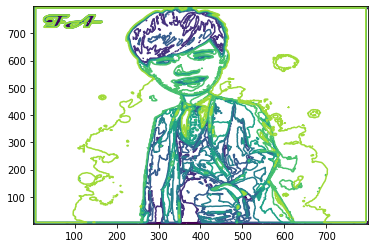

In [ ]:
gray_image = cv2.imread("17882562_1307045769381008_2265934740034945024_n.jpg" , cv2.IMREAD_GRAYSCALE)
print(gray_image.shape)

plt.contour(gray_image, origin = "image")

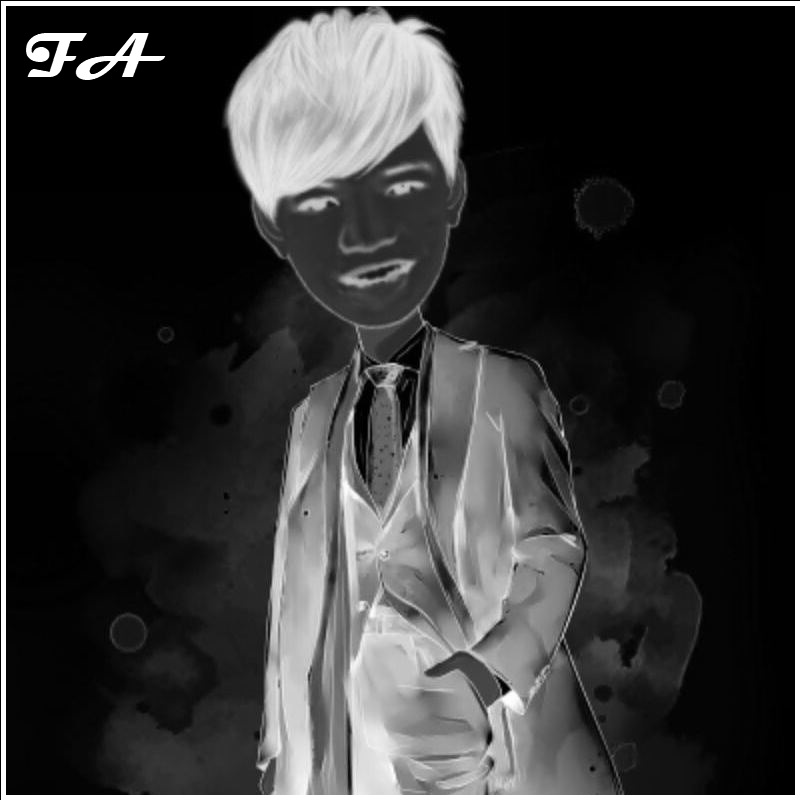

In [ ]:
# Ini adalah operasi kebalikan dari gambar skala abu-abu, Anda dapat melihat bahwa
# piksel cerah menjadi gelap, dan piksel gelap menjadi cerah
im2 = 255 - gray_image
cv2_imshow(im2)

In [ ]:
#Transformasi Fourier dari Gambar Abu-abu

# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv.blur(gray_image,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

NameError: ignored

(800, 800)


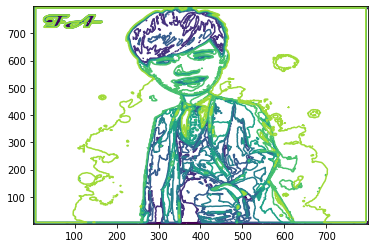

In [ ]:
gray_image = cv2.imread("17882562_1307045769381008_2265934740034945024_n.jpg" , cv2.IMREAD_GRAYSCALE)
print(gray_image.shape)

plt.contour(gray_image, origin = "image")

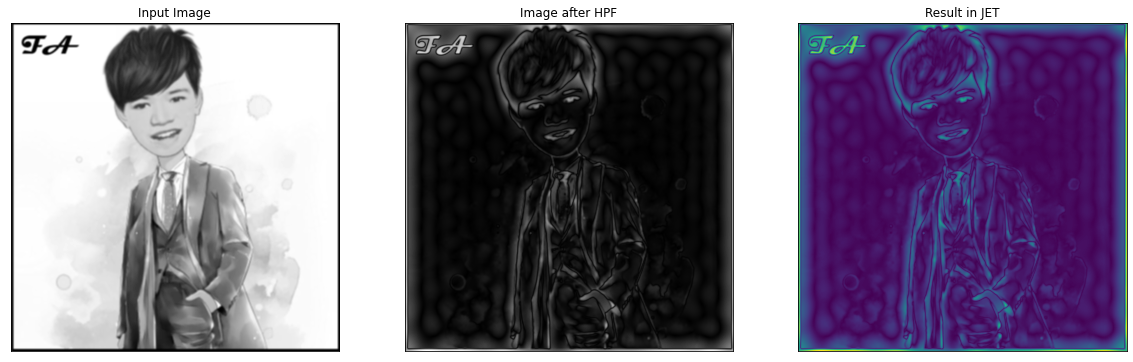

In [ ]:
#Menemukan Tepi dengan Penyaringan Highpass Visualisasi Pemrosesan FFT

rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# hapus frekuensi rendah dengan ukuran persegi panjang 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

# ***Morfologi untuk Pengolahan Citra***

In [ ]:
#Library Untuk Morfologi Pengolahan Citra

%%capture
!pip install git+https://github.com/kornia/kornia

from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
import kornia as K
from kornia import morphology as morph
from skimage.color import rgb2gray
import torch
from skimage import data
from skimage import morphology
from skimage import color
from skimage import exposure
from skimage.filters import sobel
from skimage.filters import gaussian
from skimage.transform import resize, rotate, rescale

Text(0.5, 1.0, 'Dilated Image')

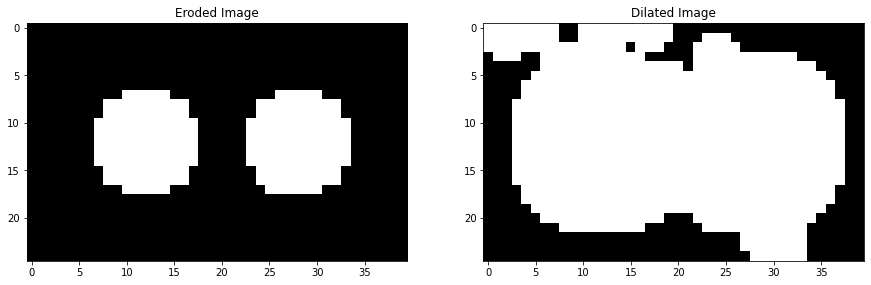

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(erosion(circle_image, element), cmap='gray')
ax[0].set_title('Eroded Image')
ax[1].imshow(dilation(circle_image, element), cmap='gray')
ax[1].set_title('Dilated Image')

Text(0.5, 1.0, 'Multi-Dilated Image')

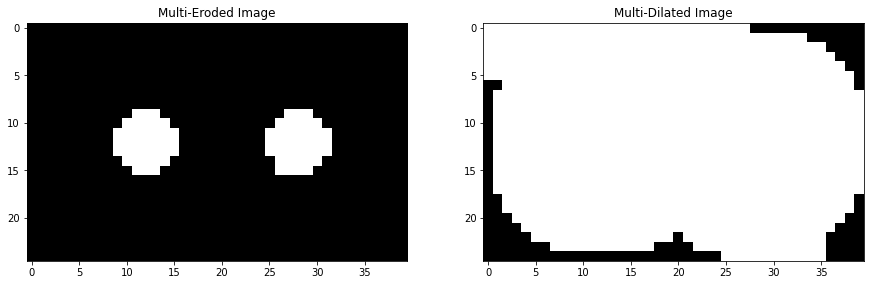

In [ ]:
def multi_dil(im, num, element=element):
    for i in range(num):
        im = dilation(im, element)
    return im
def multi_ero(im, num, element=element):
    for i in range(num):
        im = erosion(im, element)
    return im
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(multi_ero(circle_image, 2, element), cmap='gray')
ax[0].set_title('Multi-Eroded Image')
ax[1].imshow(multi_dil(circle_image, 2, element), cmap='gray')
ax[1].set_title('Multi-Dilated Image')

Text(0.5, 1.0, 'Closed Image')

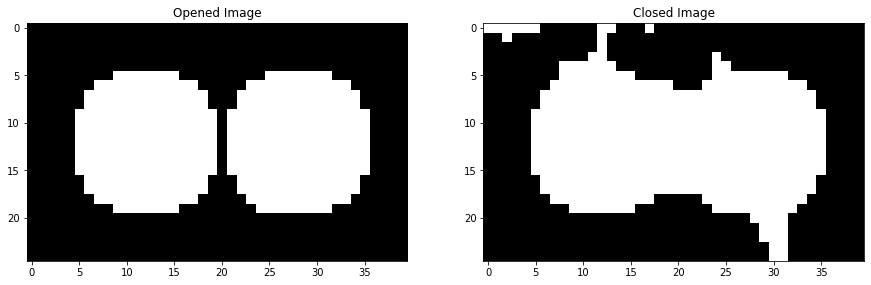

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(opening(circle_image, element), cmap='gray');
ax[0].set_title('Opened Image')
ax[1].imshow(closing(circle_image, element), cmap='gray')
ax[1].set_title('Closed Image')

In [ ]:
leaves = imread('Kawan2.jpg')
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(leaves);
ax[0].set_title('Original Image')
binary = rgb2gray(leaves)<0.15
ax[1].imshow(binary)
ax[1].set_title('Binarized Image')

multi_eroded = multi_ero(binary, 2, element)
opened = opening(multi_eroded)

multi_diluted = multi_dil(opened, 2, element)
area_morphed = area_opening(area_closing(multi_diluted, 1000), 1000)

fig, ax = plt.subplots(1,4, figsize=(12,6))
ax[0].imshow(multi_eroded)
ax[0].set_title('Multi Eroded Image')
ax[1].imshow(opened)
ax[1].set_title('Opened Image')
ax[2].imshow(multi_diluted)
ax[2].set_title('Multi Diluted Image')
ax[3].imshow(area_morphed)
ax[3].set_title('Area Morped Image')

FileNotFoundError: ignored

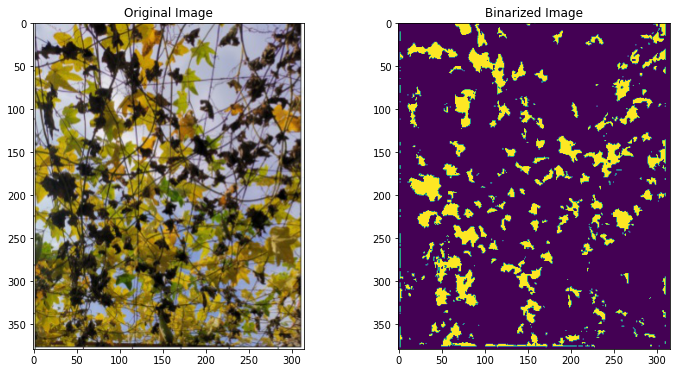

In [ ]:

leaves = imread('yellowdaun (1).jpg')
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(leaves);
ax[0].set_title('Original Image')
binary = rgb2gray(leaves)<0.15
ax[1].imshow(binary)
ax[1].set_title('Binarized Image')

element = np.array([[0,0,0,0,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,0,0,0,0]])


In [ ]:
img = cv2.imread("bakteri.jpg") # Download Image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Define RGB

device = 'cpu' # 'cuda:0' for GPU
kernel = torch.tensor([[0, 1, 0],[1, 1, 1],[0, 1, 0]]).to(device)

# to torch.tensor
img_t = K.image_to_tensor(img, keepdim=False)
img_t = img_t.float() / 255.

def plot_morph_image(tensor):

  # kornia.tensor_to_image
  image = K.tensor_to_image(tensor.squeeze(0)) # Tensor to image

  # Plot before-after
  rcParams['figure.figsize'] = 20 ,20
  fig, ax = plt.subplots(1,2)
  ax[0].axis('off')
  ax[0].imshow(img)
  ax[1].axis('off')
  ax[1].imshow(image)

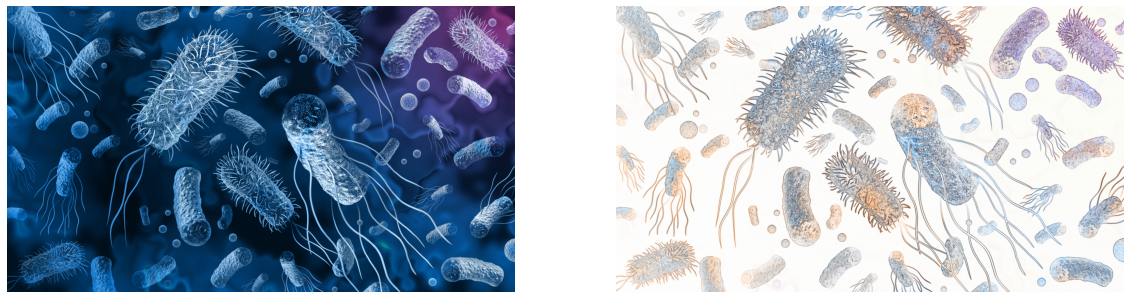

In [ ]:
graded_image = morph.gradient(img_t, kernel) # Morphological gradient
plot_morph_image(1. - graded_image)

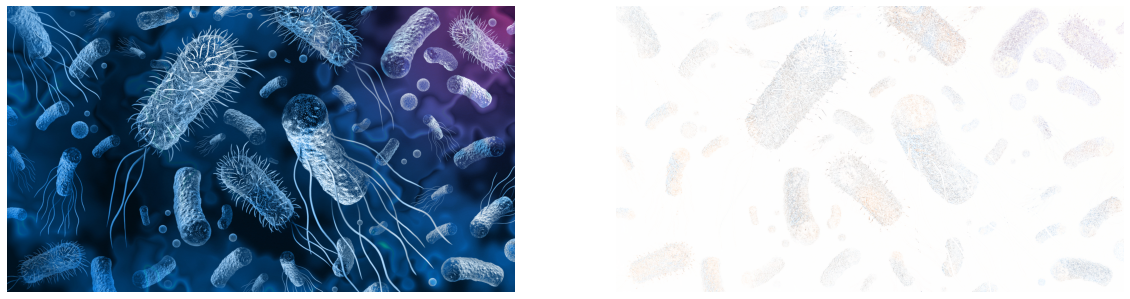

In [ ]:
bottom_image = morph.bottom_hat(img_t, kernel) # Bottom Hat
plot_morph_image(1. - bottom_image)

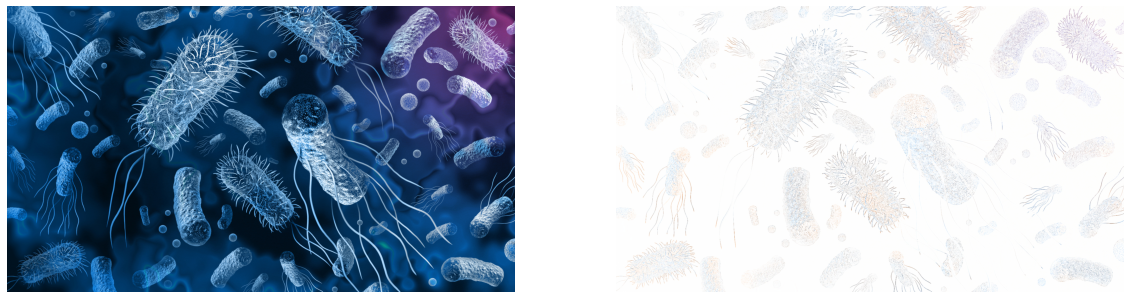

In [ ]:
toph_image = morph.top_hat(img_t, kernel) # Top Hat
plot_morph_image(1. - toph_image)

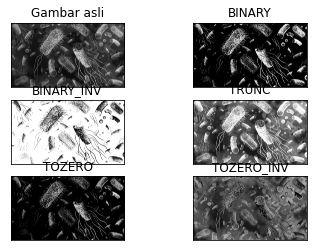

In [ ]:
# membaca gambar bakteri
img = cv2.imread('bakteri.jpg',0)

# Hitungan threshold. 
# Perhatikan nilai ambang batas bawah dan atas dari tiap fungsi 
# yang diberikan
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

# menampilkan hasil
titles = ['Gambar asli','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# menampilkan beberapa gambar sekaligus
for i in range(6):
    # 3 baris, 2 kolom
    plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

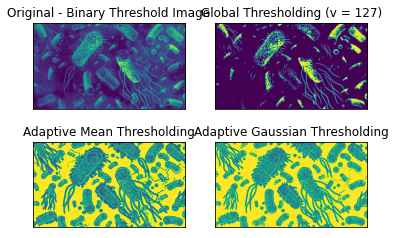

In [ ]:
# masih menggunakan variabel img yang sama
#img = cv2.imread('bakteri.jpg',0)

# digunakan median blur untuk menghaluskan tepi objek pada citra
# ini diperlukan agar thresholding memberikan hasil lebih baik
img = cv2.medianBlur(img,5)

# Lakukan Thresholding
# Binary Threshold
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Adaptive Threshold dengan Mean
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

# Adaptive Threshold dengan Gaussian
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)


# Plotting
titles = ['Original - Binary Threshold Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

# menampilkan hasil
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i] )
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
